In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataframe = pd.read_csv(r"indicadores_H5W1_wordnet_sentencebert_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w,CLASS
0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000,entailment
1,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488,3.637586,0.000000,0.0,3.637586,0.0,0.0,3.637586,entailment
2,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000,3.637586,2.251292,0.0,2.538974,0.0,0.0,0.000000,contradiction
3,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000,2.028148,0.000000,0.0,3.637586,0.0,0.0,0.000000,contradiction
4,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000,3.637586,3.637586,0.0,2.251292,0.0,0.0,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,entailment
96,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,entailment
97,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000,contradiction
98,0.655674,1.000000,1.0,0.357685,1.0,1.0,1.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000,contradiction


In [3]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.712144,0.751508,0.923311,0.496864,0.908617,0.860216,0.870180,3.216180,0.952474,0.083880,2.465364,0.155714,0.248701,0.405521
std,0.254961,0.338036,0.233606,0.327958,0.259196,0.309860,0.293922,0.979224,1.417860,0.492678,1.268416,0.691334,0.747393,1.052825
min,0.072305,0.076060,0.187566,-0.011613,-0.009505,0.026425,-0.013459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.532159,0.360418,1.000000,0.216580,1.000000,1.000000,1.000000,3.637586,0.000000,0.000000,1.871802,0.000000,0.000000,0.000000
50%,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000,3.637586,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000
75%,0.986195,1.000000,1.000000,0.807519,1.000000,1.000000,1.000000,3.637586,1.730214,0.000000,3.637586,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.637586,3.637586,3.258097,3.637586,3.637586,3.637586,3.637586


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


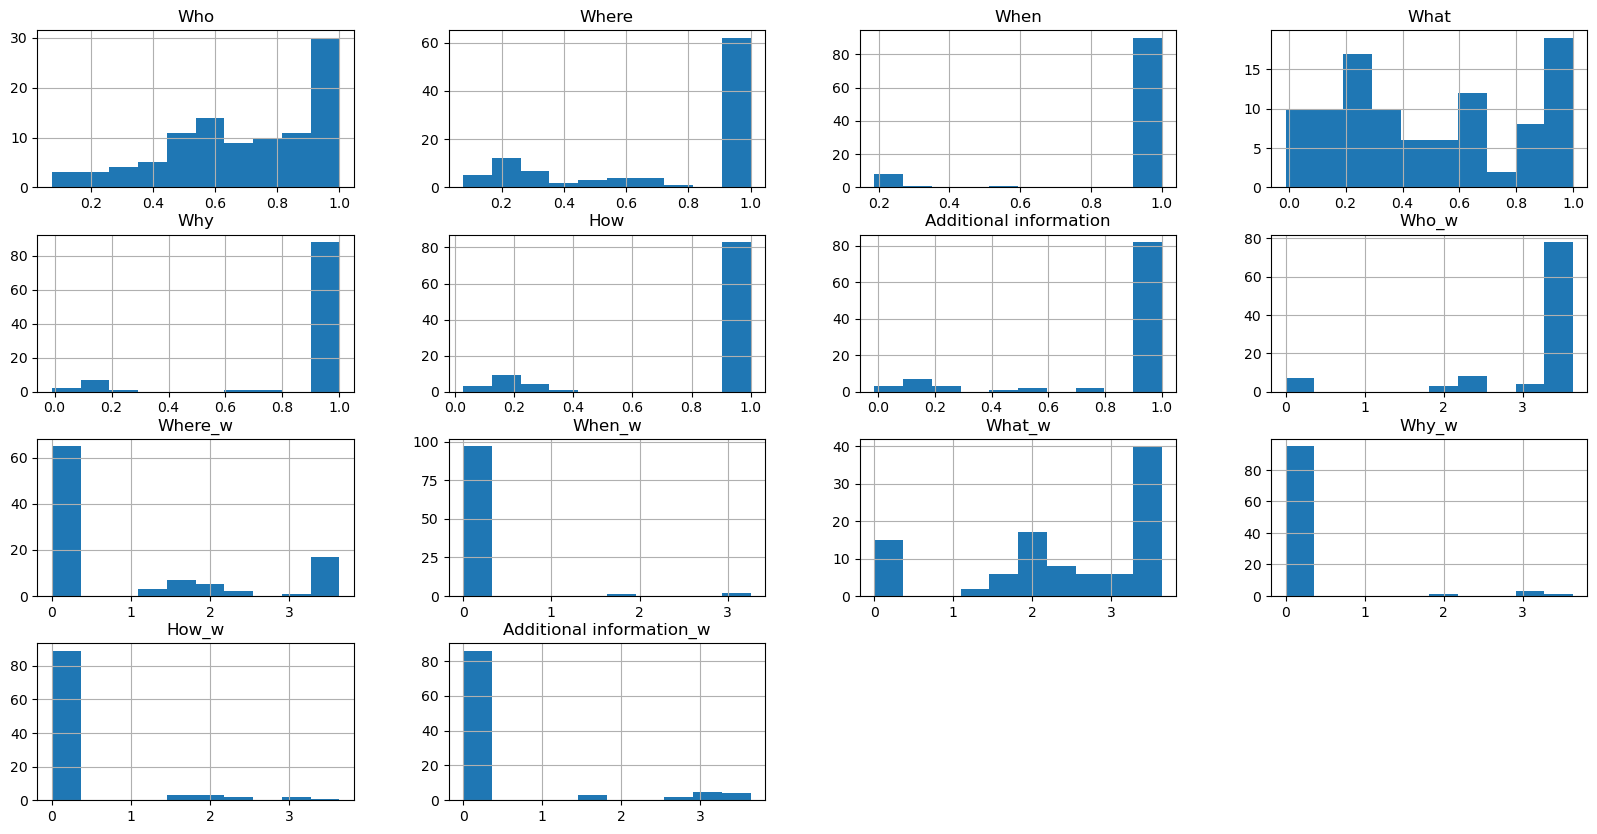

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

In [6]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [7]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_15108\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15108\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 14)

In [8]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [9]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [11]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.decision_function(X)

array([[ 9.80427403e-02,  1.86846693e-01, -2.84889433e-01],
       [-5.71259724e-01,  8.82093577e-01, -3.10833853e-01],
       [-3.72664288e-01,  2.77212856e-01,  9.54514316e-02],
       [ 3.24815609e-01,  2.27141966e-01, -5.51957575e-01],
       [-6.90929033e-01,  3.05317332e-01,  3.85611701e-01],
       [-4.38249940e-01,  1.94121395e-01,  2.44128545e-01],
       [-1.34871492e+00, -5.41956865e-01,  1.89067179e+00],
       [-6.67761860e-01,  3.82251355e-01,  2.85510505e-01],
       [-8.56186567e-01, -6.43978080e-01,  1.50016465e+00],
       [ 3.40659819e-02,  3.43137141e-01, -3.77203123e-01],
       [-6.91368000e-03,  8.53850684e-02, -7.84713884e-02],
       [ 1.66862699e-01,  1.58075682e-01, -3.24938381e-01],
       [-6.79362047e-03,  5.04944143e-01, -4.98150522e-01],
       [ 1.62450635e-01, -1.43055746e-01, -1.93948896e-02],
       [-6.78439531e-01,  1.44631421e-01,  5.33808110e-01],
       [-1.11967443e+00,  3.72824173e-01,  7.46850259e-01],
       [-5.38042932e-01,  7.24507697e-01

In [13]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information','Who_w','Where_w','When_w','What_w','Why_w','How_w','Additional information_w'])

In [14]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [15]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [16]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  10 What_w 0 Who
Entailment  3 What 11 Why_w
Neutral  11 Why_w 3 What


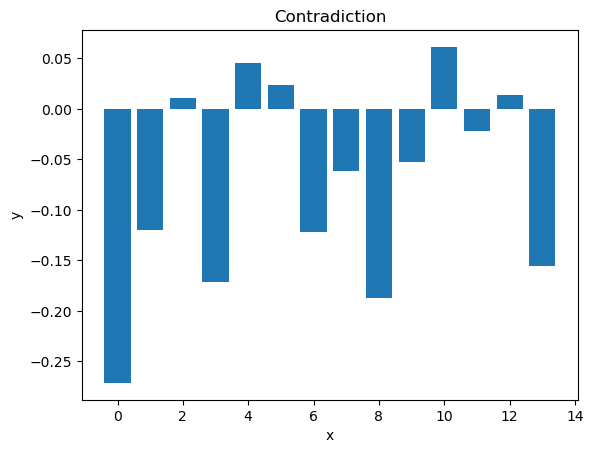

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,14,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

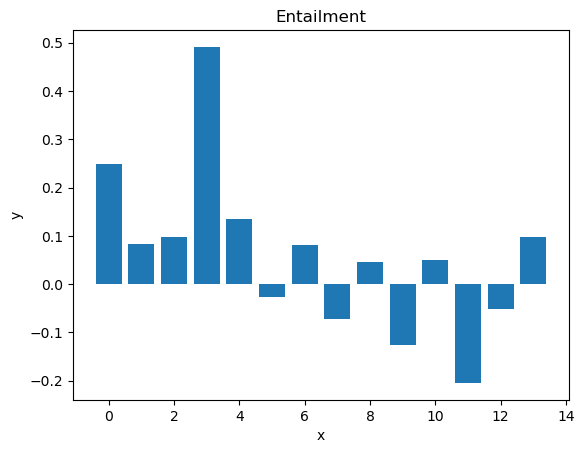

In [18]:
x_v = np.arange(0,14,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

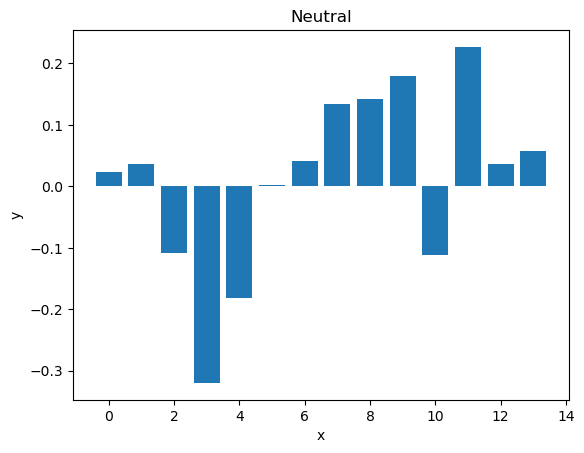

In [19]:
x_v = np.arange(0,14,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [20]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'contradiction' 'neutral'
 'neutral' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'contradiction' 'entailment' 'entailment' 'neutral'
 'neutral' 'entailment' 'neutral' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'contradiction'
 'entailment' 'contradiction' 'entailment' 'entailment' 'enta

In [21]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [22]:
X

array([[0.69678307, 0.07605992, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76258183, 1.        , 1.        , ..., 0.        , 0.        ,
        3.63758616],
       [0.88135707, 0.26540822, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07230499, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65567434, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61532092, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
model.score(X,y)

0.63

In [24]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [25]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.466667 (0.184592)


In [26]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [27]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [28]:
print(confusion_matrix(Y_validation, predictions,labels=model.classes_))

[[1 2 0]
 [0 5 0]
 [0 2 0]]


In [29]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       1.00      0.33      0.50         3
   entailment       0.56      1.00      0.71         5
      neutral       0.00      0.00      0.00         2

     accuracy                           0.60        10
    macro avg       0.52      0.44      0.40        10
 weighted avg       0.58      0.60      0.51        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
